In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import torch 

#### Creating Dataset
A simple dataset using numpy arrays

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

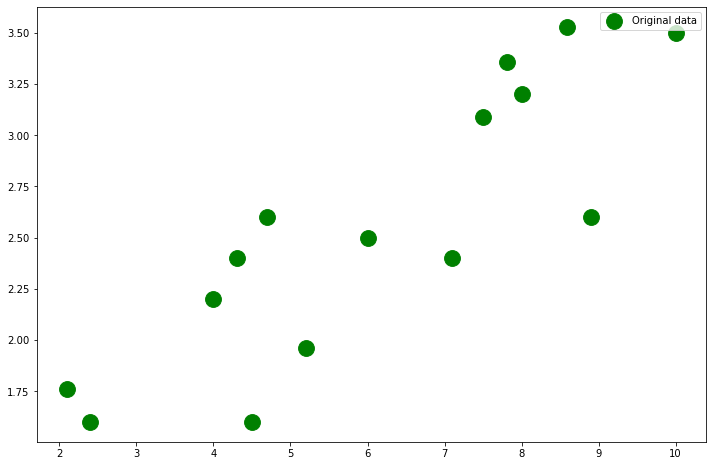

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [5]:
#convert to tensor
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)
#pring grad property
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [6]:
input_size = 1 
hidden_size = 1
output_size = 1

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [7]:
#manual construction of layers
#weights for input to NN -- grad is true here
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [10]:
#weights for hidden layer - grad is true here
w2 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
w2.shape

torch.Size([1, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function
* again doing mat product data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [11]:
#design hyperparameter - step size towards next value
learning_rate = 1e-6

In [12]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
#loop is the training iterations/epochs
for iter in range(1, 10):
    
    y_pred = X_train.mm(w1).mm(w2) #forward pass for prediction
    loss = (y_pred - Y_train).pow(2).sum() #loss function - mean square error
    
    if iter % 50 ==0:
        print(iter, loss.item()) #print ou loss every 50 epochs
        #to check for convergence
        
    loss.backward() #calculates gradients for the tesnors w2 and w1
    
    with torch.no_grad(): #update the weights
        #don't track gradients during this step
        w1 -= learning_rate * w1.grad #modify the weight tensor by the gradient
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()#re-initialize the gradients for the next pass
        w2.grad.zero_()

In [13]:
#final wights after all loops
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.7632]], requires_grad=True)
w2:  tensor([[0.3711]], requires_grad=True)


#### Checking the output
use the trained model for output using train data to see if it was close

Converting data into a tensor

In [14]:

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [15]:
#matrix multiply weights by input tensor to get predictions
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.3311],
        [0.6797],
        [2.1241],
        [2.0108],
        [1.2178],
        [2.2136],
        [2.5205],
        [1.4727],
        [2.4328],
        [0.5947],
        [2.2657],
        [2.8321],
        [1.2744],
        [1.6992],
        [1.1328]], grad_fn=<MmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [16]:
#detach predictions from computation graph and convert to numpy array
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.331076  ],
       [0.67969847],
       [2.1240575 ],
       [2.0107744 ],
       [1.2177931 ],
       [2.2135513 ],
       [2.5205483 ],
       [1.4726799 ],
       [2.432754  ],
       [0.5947361 ],
       [2.2656615 ],
       [2.8320768 ],
       [1.2744346 ],
       [1.6992462 ],
       [1.1328307 ]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

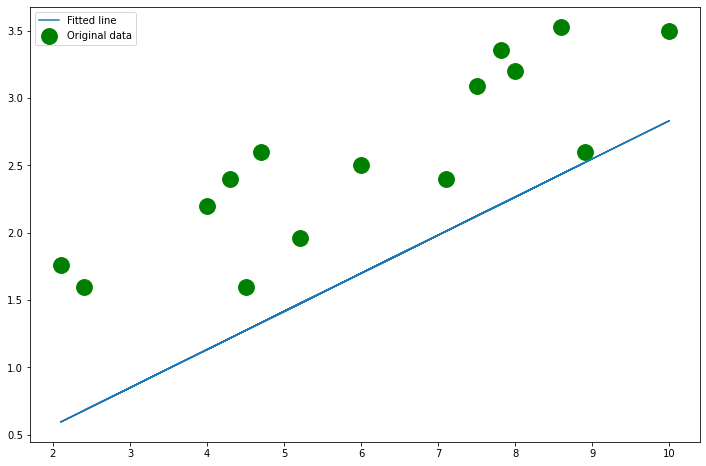

In [17]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()
#not a great match b/c didn't train long enough

# re-do with training for 1000 epochs

In [24]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
#loop is the training iterations/epochs
for iter in range(1, 1000):
    
    y_pred = X_train.mm(w1).mm(w2) #forward pass for prediction
    loss = (y_pred - Y_train).pow(2).sum() #loss function - mean square error
    
    if iter % 50 ==0:
        print(iter, loss.item()) #print ou loss every 50 epochs
        #to check for convergence
        
    loss.backward() #calculates gradients for the tesnors w2 and w1
    
    with torch.no_grad(): #update the weights
        #don't track gradients during this step
        w1 -= learning_rate * w1.grad #modify the weight tensor by the gradient
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()#re-initialize the gradients for the next pass
        w2.grad.zero_()

50 10.292611122131348
100 9.731087684631348
150 9.215676307678223
200 8.74320125579834
250 8.310644149780273
300 7.915120601654053
350 7.553880214691162
400 7.224338531494141
450 6.924039840698242
500 6.650661468505859
550 6.402080535888672
600 6.176258087158203
650 5.97130823135376
700 5.785462856292725
750 5.617093563079834
800 5.464677333831787
850 5.326816082000732
900 5.202212810516357
950 5.089678764343262


In [25]:
#final wights after all loops
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.8029]], requires_grad=True)
w2:  tensor([[0.4471]], requires_grad=True)


#### Checking the output
use the trained model for output using train data to see if it was close

Converting data into a tensor

In [26]:

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [27]:
#matrix multiply weights by input tensor to get predictions
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.6874],
        [0.8616],
        [2.6926],
        [2.5490],
        [1.5438],
        [2.8061],
        [3.1952],
        [1.8669],
        [3.0839],
        [0.7539],
        [2.8721],
        [3.5902],
        [1.6156],
        [2.1541],
        [1.4361]], grad_fn=<MmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [28]:
#detach predictions from computation graph and convert to numpy array
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.6873711],
       [0.8616364],
       [2.6926136],
       [2.5490077],
       [1.5437653],
       [2.8060625],
       [3.1952345],
       [1.8668786],
       [3.0839403],
       [0.7539318],
       [2.8721213],
       [3.5901515],
       [1.6155682],
       [2.154091 ],
       [1.4360607]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

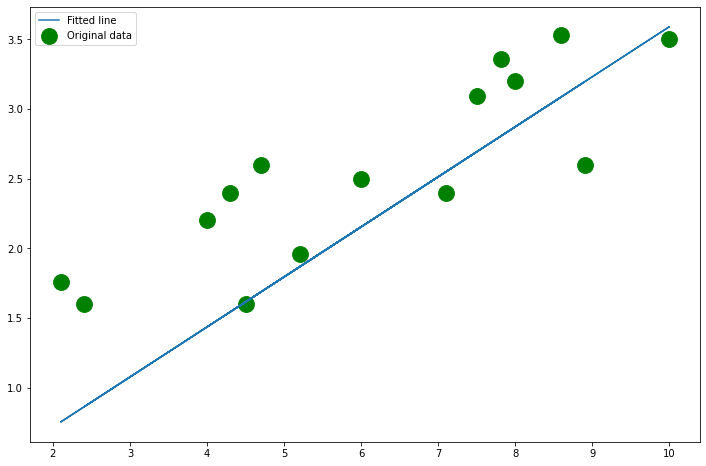

In [29]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()
#still not great with 100 iterations, okay with 100 iterations

# re-do with training for 3000 epochs

In [31]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
#loop is the training iterations/epochs
for iter in range(1, 3000):
    
    y_pred = X_train.mm(w1).mm(w2) #forward pass for prediction
    loss = (y_pred - Y_train).pow(2).sum() #loss function - mean square error
    
    if iter % 50 ==0:
        print(iter, loss.item()) #print ou loss every 50 epochs
        #to check for convergence
        
    loss.backward() #calculates gradients for the tesnors w2 and w1
    
    with torch.no_grad(): #update the weights
        #don't track gradients during this step
        w1 -= learning_rate * w1.grad #modify the weight tensor by the gradient
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()#re-initialize the gradients for the next pass
        w2.grad.zero_()

50 4.177831649780273
100 4.168377876281738
150 4.1599249839782715
200 4.152368068695068
250 4.145613670349121
300 4.139576435089111
350 4.134183406829834
400 4.129364490509033
450 4.125060081481934
500 4.121216773986816
550 4.117784023284912
600 4.114718914031982
650 4.111982822418213
700 4.1095404624938965
750 4.107360363006592
800 4.105413436889648
850 4.103677272796631
900 4.102128982543945
950 4.1007466316223145
1000 4.099512577056885
1050 4.098412036895752
1100 4.097430229187012
1150 4.096555709838867
1200 4.095774173736572
1250 4.095078945159912
1300 4.094457149505615
1350 4.093903541564941
1400 4.093409538269043
1450 4.09296989440918
1500 4.092577934265137
1550 4.092227935791016
1600 4.091915607452393
1650 4.091637134552002
1700 4.091389179229736
1750 4.091168403625488
1800 4.09097146987915
1850 4.090795516967773
1900 4.090639114379883
1950 4.090500354766846
2000 4.090374946594238
2050 4.090265274047852
2100 4.090165138244629
2150 4.090078353881836
2200 4.089999198913574
2250 4.

In [32]:
#final wights after all loops
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.8227]], requires_grad=True)
w2:  tensor([[0.4817]], requires_grad=True)


#### Checking the output
use the trained model for output using train data to see if it was close

Converting data into a tensor

In [33]:

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [34]:
#matrix multiply weights by input tensor to get predictions
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8623],
        [0.9510],
        [2.9718],
        [2.8133],
        [1.7038],
        [3.0970],
        [3.5266],
        [2.0605],
        [3.4037],
        [0.8321],
        [3.1699],
        [3.9624],
        [1.7831],
        [2.3775],
        [1.5850]], grad_fn=<MmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [35]:
#detach predictions from computation graph and convert to numpy array
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8623409 ],
       [0.95098275],
       [2.9718208 ],
       [2.8133235 ],
       [1.7038441 ],
       [3.0970335 ],
       [3.5265605 ],
       [2.0604625 ],
       [3.4037256 ],
       [0.83210975],
       [3.1699421 ],
       [3.9624279 ],
       [1.7830925 ],
       [2.3774567 ],
       [1.5849711 ]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

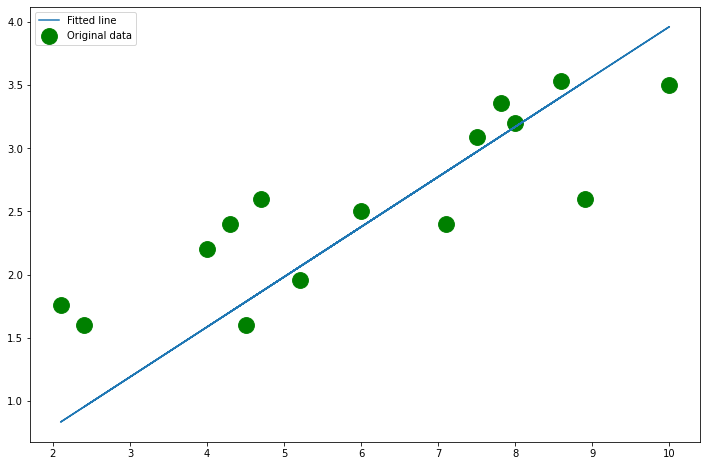

In [36]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()
#still not great with 100 iterations, okay with 100 iterations
#3000 iterations ~ 'perfect' per training